### 2 - PR√â-PROCESSAMENTO - TOKENIZA√á√ÉO E LEMATIZA√á√ÉO

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# CARREGANDO BIBLIOTECAS
import pandas as pd
import nltk
from nltk.stem import RSLPStemmer
import unidecode
import re
from collections import Counter, OrderedDict
import time
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# CARREGANDO DADOS
df_reviews = pd.read_csv('df-reviews-ternario.csv')
df_reviews.head(3)

reviewId          userName  \
0  33b6e638-8373-4ec9-a0b4-4260cf0a91c1   Felipe Teixeira   
1  490680d7-e9f4-4fde-bf8e-27b8b1c20e3b  Renan Cavagnolli   
2  5d50ac9d-1558-45de-aa7f-ec824c4eea62      √çgor X Costa   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AItbvm...   
1  https://play-lh.googleusercontent.com/a/AItbvm...   
2  https://play-lh.googleusercontent.com/a-/AFdZu...   

                                             content  score  thumbsUpCount  \
0  Pr√≥s - Comparado ao aplicativo das concorrente...      3           1558   
1  Tem alguns problemas. Ex: Na navega√ß√£o, quando...      3           1883   
2  O aplicativo √© bem b√°sico. Tem informa√ß√µes suf...      3           1012   

  reviewCreatedVersion                   at replyContent repliedAt     app  \
0          20.20.0.100  2020-10-13 12:31:34          NaN       NaN  Amazon   
1          20.10.0.100  2020-05-25 03:41:07          NaN       NaN  Amazon   
2          20.22.4.100  2020-12-23 10:12:01          NaN       NaN  Amazon   

  sentimento  
0     neutro  
1     neutro  
2     neutro

In [4]:
len(df_reviews)

319143

In [5]:
df_content = df_reviews.loc[0: ,["content", "sentimento"]]
df_content.head(5)

content sentimento
0  Pr√≥s - Comparado ao aplicativo das concorrente...     neutro
1  Tem alguns problemas. Ex: Na navega√ß√£o, quando...     neutro
2  O aplicativo √© bem b√°sico. Tem informa√ß√µes suf...     neutro
3  Navegar pela lista de desejos, eventualmente, ...     neutro
4  Precisa melhorar a quest√£o da interface e prin...     neutro

#### TOKENIZA√á√ÉO

In [ ]:
# PASSO 1 - REMO√á√ÉO DE CARACTERES: ACENTOS, PONTUA√á√ïES, N√öMEROS E CONVERS√ÉO EM MIN√öSCULAS;
# - EXIBIR FREQU√äNCIA DE PALAVRAS;
# - NUVEM DE PALAVRAS: TR√äS CLASSES;
# PASSO 2 - CORRE√á√ÉO ORTOGR√ÅFICA, CORRE√á√ÉO DIGITA√á√ÉO, REMO√á√ÉO DE LETRAS REPETIDAS ETC
# PASSO 3 - REMO√á√ÉO DAS STOPWORDS;
# - NUVEM DE PALAVRAS: TR√äS CLASSES

In [6]:
# CRIANDO NOVA WORDCLOUD ANTES DA LIMPEZA
textos1 = df_content['content'].tolist() 
texto_wordcloud1  = " ".join(textos1)

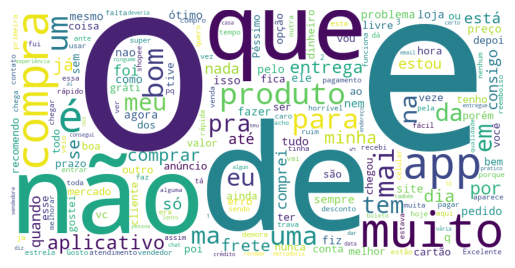

In [7]:
# WORDCLOUD
wordcloud1 = WordCloud(width = 800, height = 400, background_color = "white", collocations = False, 
                      include_numbers = True, random_state = 1)
wordcloud1.generate(texto_wordcloud1 )

# GR√ÅFICO
#plt.figure(figsize = (40, 8))
plt.axis("off")
plt.imshow(wordcloud1)
wordcloud1.to_file("wordcloud_antes.png")

In [8]:
# PASSO 1 - REMO√á√ÉO DE CARACTERES: ACENTOS, PONTUA√á√ïES, N√öMEROS E CONVERS√ÉO EM MIN√öSCULAS;
# FUN√á√ÉO DE REMO√á√ÉO
def RemoveCaracter(string):
    texto = unidecode.unidecode(string)                               # REMOVE ACENTOS
    texto = re.sub(r"[@#$%&*^~-¬¥'¬≤¬≥\\//|<>:;,.!?'0-9]", " ", texto)
    texto = texto.replace('_','')
    texto = texto.replace('`','')
    texto = texto.replace('"','')
    texto = texto.replace('[','')
    texto = texto.replace(']','')
    texto = texto.replace('{','')
    texto = texto.replace('}','')
    texto = texto.replace('(','')
    texto = texto.replace(')','')
    texto = texto.replace('+','')
    texto = texto.replace('-','')
    texto = texto.replace('=','')

    texto = texto.lower()                                             # CONVERTE PARA MIN√öSCULA
    
    return texto

In [9]:
df_content['passo1'] = df_reviews['content'].apply(RemoveCaracter)    # APLICA A FUN√á√ÉO DE REMO√á√ÉO
df_content = df_content.loc[0:,['sentimento', 'content', 'passo1']]

In [10]:
df_content.head(5)

sentimento                                            content  \
0     neutro  Pr√≥s - Comparado ao aplicativo das concorrente...   
1     neutro  Tem alguns problemas. Ex: Na navega√ß√£o, quando...   
2     neutro  O aplicativo √© bem b√°sico. Tem informa√ß√µes suf...   
3     neutro  Navegar pela lista de desejos, eventualmente, ...   
4     neutro  Precisa melhorar a quest√£o da interface e prin...   

                                              passo1  
0  pros  comparado ao aplicativo das concorrentes...  
1  tem alguns problemas  ex  na navegacao  quando...  
2  o aplicativo e bem basico  tem informacoes suf...  
3  navegar pela lista de desejos  eventualmente  ...  
4  precisa melhorar a questao da interface e prin...

In [11]:
# FREQU√äNCIA DE PALAVRAS
lista_sentencas = df_content['passo1'].tolist()                                    # TRANSFORMA COLUNA EM LISTA
concatena_sentencas = " ".join(lista_sentencas)                                    # CONCATENA AS SENTEN√áAS DA LISTA
lista_palavras = concatena_sentencas.split(" ")                                    # FAZ O SPLIT DAS PALAVRAS 
lista_palavras = [item.strip() for item in lista_palavras if item.strip() != '']   # REMOVE ITENS QUE S√ÉO ESPA√áOS

In [12]:
len(lista_palavras)

6371763

In [13]:
frequencia = Counter(lista_palavras) # GERA A FREQU√äNCIA DE CADA PALAVRA

In [14]:
frequencia_decrescente = {k: v for k, v in sorted(frequencia.items(), key = lambda item: item[1], reverse = True)}
dict(list(frequencia_decrescente.items())[:20]) # VISUALIZAR AS 20 PALAVRAS DE MAIOR FREQU√äNCIA

{'e': 290240,
 'o': 210675,
 'nao': 192964,
 'de': 180917,
 'que': 142610,
 'a': 135862,
 'muito': 85410,
 'app': 74837,
 'com': 67747,
 'no': 65212,
 'um': 65060,
 'do': 58851,
 'bom': 57526,
 'mais': 56923,
 'para': 55759,
 'compra': 52385,
 'uma': 50572,
 'mas': 44229,
 'da': 43418,
 'em': 42635}

In [15]:
len(frequencia_decrescente)

60439

In [16]:
frequencia_crescente = {k: v for k, v in sorted(frequencia.items(), key = lambda item: item[1], reverse = False)}
dict(list(frequencia_crescente.items())[:20]) # VISUALIZAR AS 20 PALAVRAS DE MENOR FREQU√äNCIA

{'saldoes': 1,
 'srou': 1,
 'tardio': 1,
 'resolverde': 1,
 'transparecia': 1,
 'xiava': 1,
 'ataquei': 1,
 'renovou': 1,
 'despriorizacao': 1,
 'presisar': 1,
 'suprida': 1,
 'misteira': 1,
 'reflexoes': 1,
 'dificulddades': 1,
 'kimetsu': 1,
 'yaiba': 1,
 'naaao': 1,
 'trilogia': 1,
 'indiana': 1,
 'embaralhadas': 1}

In [17]:
len(frequencia_crescente)

60439

In [18]:
# PASSO 2 - CORRE√á√ÉO ORTOGR√ÅFICA, DIGITA√á√ÉO, REMO√á√ÉO DE LETRAS REPETIDAS EM PALAVRAS ALONGADAS 
ortografia = pd.read_csv('correcao-ortografica.csv', header = None, index_col = 0, squeeze = True).to_dict()

In [19]:
digitacao = pd.read_csv('correcao-digitacao.csv', header = None, index_col = 0, squeeze = True).to_dict()

In [20]:
separacao = pd.read_csv('separa-palavras.csv', header = None, index_col = 0, squeeze = True).to_dict()

In [21]:
# FUN√á√ÉO DE REMO√á√ÉO DE ESPA√áO
def RemoveEspaco(item):
    remove_espaco = item.strip() # REMOVE ESPA√áOS NO IN√çCIO E NO FIM DA STRING
    return remove_espaco

In [22]:
digrafos_vogais = open("digrafos-vogais-identicas.txt", encoding = 'UTF-8')
digrafos_vogais = list(map(RemoveEspaco, digrafos_vogais))  

In [23]:
# FUN√á√ÉO DE CORRE√á√ÉO 
def Correcao1(texto, correcao = ortografia):     
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_corrigida = []
    
    
    for palavra in lista_palavras:
        if (palavra in correcao):
            palavra_correta = correcao.get(palavra)
            
            lista_corrigida.append(palavra_correta)
        else:
            lista_corrigida.append(palavra)
            continue
    
    texto_final = " ".join(lista_corrigida) 
    texto_final = RemoveCaracter(texto_final)

    return texto_final

In [24]:
def Correcao2(texto, correcao = digitacao):     
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_corrigida = []
    
    for palavra in lista_palavras:
        if (palavra in correcao):
            palavra_correta = correcao.get(palavra)
            
            lista_corrigida.append(palavra_correta)
        else:
            lista_corrigida.append(palavra)
            continue
    

    texto_final = " ".join(lista_corrigida) 
    texto_final = RemoveCaracter(texto_final)

    return texto_final

In [25]:
# CORRE√á√ÉO ESPECIFICA PARA ESTE ESTE EXPERIMENTO
def Correcao3(texto, correcao = separacao):     
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_corrigida = []
    
    for palavra in lista_palavras:
        if (palavra in correcao):
            palavra_correta = correcao.get(palavra)
            
            lista_corrigida.append(palavra_correta)
        else:
            lista_corrigida.append(palavra)
            continue
    
    texto_final = " ".join(lista_corrigida) 
    texto_final = RemoveCaracter(texto_final)

    return texto_final

In [26]:
# CORRE√á√ÉO ORTOGRAFICA
df_content['passo2'] = df_content['passo1'].apply(Correcao1)
df_content['passo2'] = df_content['passo2'].apply(Correcao2)
df_content['passo2'] = df_content['passo2'].apply(Correcao3)
df_content.head(5)

sentimento                                            content  \
0     neutro  Pr√≥s - Comparado ao aplicativo das concorrente...   
1     neutro  Tem alguns problemas. Ex: Na navega√ß√£o, quando...   
2     neutro  O aplicativo √© bem b√°sico. Tem informa√ß√µes suf...   
3     neutro  Navegar pela lista de desejos, eventualmente, ...   
4     neutro  Precisa melhorar a quest√£o da interface e prin...   

                                              passo1  \
0  pros  comparado ao aplicativo das concorrentes...   
1  tem alguns problemas  ex  na navegacao  quando...   
2  o aplicativo e bem basico  tem informacoes suf...   
3  navegar pela lista de desejos  eventualmente  ...   
4  precisa melhorar a questao da interface e prin...   

                                              passo2  
0  pros comparado ao aplicativo das concorrentes ...  
1  tem alguns problemas ex na navegacao quando en...  
2  o aplicativo e bem basico tem informacoes sufi...  
3  navegar pela lista de desejos eventualmente to...  
4  precisa melhorar a questao da interface e prin...

In [27]:
# SEGUNDA REMO√á√ÉO DE PONTUA√á√ÉO 
df_content['passo2'] = df_content['passo2'].apply(RemoveCaracter)    # APLICA A FUN√á√ÉO DE REMO√á√ÉO

In [28]:
df_content.head(5)

sentimento                                            content  \
0     neutro  Pr√≥s - Comparado ao aplicativo das concorrente...   
1     neutro  Tem alguns problemas. Ex: Na navega√ß√£o, quando...   
2     neutro  O aplicativo √© bem b√°sico. Tem informa√ß√µes suf...   
3     neutro  Navegar pela lista de desejos, eventualmente, ...   
4     neutro  Precisa melhorar a quest√£o da interface e prin...   

                                              passo1  \
0  pros  comparado ao aplicativo das concorrentes...   
1  tem alguns problemas  ex  na navegacao  quando...   
2  o aplicativo e bem basico  tem informacoes suf...   
3  navegar pela lista de desejos  eventualmente  ...   
4  precisa melhorar a questao da interface e prin...   

                                              passo2  
0  pros comparado ao aplicativo das concorrentes ...  
1  tem alguns problemas ex na navegacao quando en...  
2  o aplicativo e bem basico tem informacoes sufi...  
3  navegar pela lista de desejos eventualmente to...  
4  precisa melhorar a questao da interface e prin...

In [29]:
# REMO√á√ÉO DE PALAVRAS N√ÉO √öTEIS
lista_exclusao = open("lista-exclusao.txt", encoding = 'UTF-8')
lista_exclusao = list(map(RemoveCaracter, lista_exclusao))    # RETIRA ACENTOS DAS STOPWORDS PARA IGUALAR AS PALAVRAS DO DATASET
lista_exclusao = list(map(RemoveEspaco, lista_exclusao))  

In [30]:
# FUN√á√ÉO DE REMO√á√ÉO DE PALAVRAS N√ÉO √öTEIS
def RemovePalavras(texto, lista = lista_exclusao):     
    lista_palavras = texto.split(" ")                                                             # SPLIT DAS PALAVRAS
    remove_palavras = [palavras for palavras in lista_palavras if palavras not in lista_exclusao] # REMOVE PLAVRAS
    lista_palavras = [item.strip() for item in remove_palavras if item.strip() != '']             # REMOVE ITENS QUE S√ÉO ESPA√áOS
    texto_final = ' '.join(lista_palavras)                                                        # CONCATENA A LISTA
    return texto_final

In [31]:
df_content['passo3'] = df_content['passo2'].apply(RemovePalavras)

In [32]:
df_content.head(5)

sentimento                                            content  \
0     neutro  Pr√≥s - Comparado ao aplicativo das concorrente...   
1     neutro  Tem alguns problemas. Ex: Na navega√ß√£o, quando...   
2     neutro  O aplicativo √© bem b√°sico. Tem informa√ß√µes suf...   
3     neutro  Navegar pela lista de desejos, eventualmente, ...   
4     neutro  Precisa melhorar a quest√£o da interface e prin...   

                                              passo1  \
0  pros  comparado ao aplicativo das concorrentes...   
1  tem alguns problemas  ex  na navegacao  quando...   
2  o aplicativo e bem basico  tem informacoes suf...   
3  navegar pela lista de desejos  eventualmente  ...   
4  precisa melhorar a questao da interface e prin...   

                                              passo2  \
0  pros comparado ao aplicativo das concorrentes ...   
1  tem alguns problemas ex na navegacao quando en...   
2  o aplicativo e bem basico tem informacoes sufi...   
3  navegar pela lista de desejos eventualmente to...   
4  precisa melhorar a questao da interface e prin...   

                                              passo3  
0  pros comparado ao aplicativo das concorrentes ...  
1  tem alguns problemas ex na navegacao quando en...  
2  aplicativo e bem basico tem informacoes sufici...  
3  navegar pela lista de desejos eventualmente to...  
4  precisa melhorar a questao da interface e prin...

In [33]:
# REMOVER LETRAS REPETIDAS EM PALAVRAS ALONGADAS
# FUN√á√ÉO PARA REMO√á√ÉO DE LETRAS REPETIDAS EM PALAVRAS ALONGADAS
def RemoveLetras(texto, lista = digrafos_vogais):
    lista_palavras =  texto.split(" ")  
    novo_texto = []
    vogais = ['a','e','i','o','u']
    consoantes = ['b','c','d','f','g','h','j','k','l','m','n','p','q','r','s','t','v','w','x','y','z']
    
    for palavra in  lista_palavras:
        palavra_separada = list(palavra)
        
        if (palavra in lista):
            novo_texto.append(palavra)
            
        elif (len(set(palavra_separada).intersection(consoantes)) > 0 and len(set(palavra_separada).intersection(vogais)) > 0 and palavra_separada not in lista):
            nova_palavra = []
            letra_inicial = palavra_separada[0]
            nova_palavra.append(letra_inicial)

            for i in range(1, len(palavra_separada)):
                    letra = palavra_separada[i]
                    
                    if (letra != palavra_separada[i-1]):
                        nova_palavra.append(letra) 
                    else:
                        continue 
            nova_palavra = "".join(nova_palavra)
            novo_texto.append(nova_palavra)
                    
        else:
            continue
            
    novo_texto = " ".join(novo_texto)
    return novo_texto

In [34]:
df_content['passo4'] = df_content['passo3'].apply(RemoveLetras)

In [35]:
# APLICANDO NOVAMENTE AS CORRE√á√ïES AP√ìS A REMO√á√ÉO DE LETRAS REPETIDAS EM PALAVRAS ALONGADAS
df_content['passo4'] = df_content['passo4'].apply(Correcao1)
df_content['passo4'] = df_content['passo4'].apply(Correcao2)

In [36]:
# REMOVER DE PONTUA√á√ÉO NOVAMENTE AP√ìS CORRE√á√ÉO
df_content['passo4'] = df_content['passo4'].apply(RemoveCaracter)    # APLICA A FUN√á√ÉO DE REMO√á√ÉO

In [37]:
df_content.head(5)

sentimento                                            content  \
0     neutro  Pr√≥s - Comparado ao aplicativo das concorrente...   
1     neutro  Tem alguns problemas. Ex: Na navega√ß√£o, quando...   
2     neutro  O aplicativo √© bem b√°sico. Tem informa√ß√µes suf...   
3     neutro  Navegar pela lista de desejos, eventualmente, ...   
4     neutro  Precisa melhorar a quest√£o da interface e prin...   

                                              passo1  \
0  pros  comparado ao aplicativo das concorrentes...   
1  tem alguns problemas  ex  na navegacao  quando...   
2  o aplicativo e bem basico  tem informacoes suf...   
3  navegar pela lista de desejos  eventualmente  ...   
4  precisa melhorar a questao da interface e prin...   

                                              passo2  \
0  pros comparado ao aplicativo das concorrentes ...   
1  tem alguns problemas ex na navegacao quando en...   
2  o aplicativo e bem basico tem informacoes sufi...   
3  navegar pela lista de desejos eventualmente to...   
4  precisa melhorar a questao da interface e prin...   

                                              passo3  \
0  pros comparado ao aplicativo das concorrentes ...   
1  tem alguns problemas ex na navegacao quando en...   
2  aplicativo e bem basico tem informacoes sufici...   
3  navegar pela lista de desejos eventualmente to...   
4  precisa melhorar a questao da interface e prin...   

                                              passo4  
0  pros comparado aplicativo das concorrentes de ...  
1  tem alguns problemas ex na navegacao quando en...  
2  aplicativo bem basico tem informacoes suficien...  
3  navegar pela lista de desejos eventualmente to...  
4  precisa melhorar questao da interface principa...

In [38]:
# PASSO 3 - REMO√á√ÉO DAS STOPWORDS 
stopwords = open("stopwords.txt", encoding = 'UTF-8')
stopwords = list(map(RemoveCaracter, stopwords))      # RETIRA ACENTOS DAS STOPWORDS PARA IGUALAR AS PALAVRAS DO DATASET
stopwords = list(map(RemoveEspaco, stopwords))        

In [39]:
# FUN√á√ÉO DE REMO√á√ÉO DE STOPWORDS
def RemoveStopwords(texto, stopwords = stopwords):     
    lista_palavras = texto.split(" ")                                                         # SPLIT DAS PALAVRAS
    remove_stopwords = [palavras for palavras in lista_palavras if palavras not in stopwords] # REMOVE STOPWORDS
    lista_palavras = [item.strip() for item in remove_stopwords if item.strip() != '']        # REMOVE ITENS QUE S√ÉO ESPA√áOS
    texto_final = ' '.join(lista_palavras)                                                    # CONCATENA A LISTA
    return texto_final

In [40]:
df_content['passo5'] = df_content['passo4'].apply(RemoveStopwords)

In [41]:
# QUANTIDADE DE ATRIBUTOS AP√ìS REMO√á√ÉO STOPWORDS
count_vectorizer1 = CountVectorizer(ngram_range = (1,1))
count_vectorizer1.fit_transform(df_content.passo5)
variaveis1 = count_vectorizer1.get_feature_names()

In [42]:
df_content.head(5)

sentimento                                            content  \
0     neutro  Pr√≥s - Comparado ao aplicativo das concorrente...   
1     neutro  Tem alguns problemas. Ex: Na navega√ß√£o, quando...   
2     neutro  O aplicativo √© bem b√°sico. Tem informa√ß√µes suf...   
3     neutro  Navegar pela lista de desejos, eventualmente, ...   
4     neutro  Precisa melhorar a quest√£o da interface e prin...   

                                              passo1  \
0  pros  comparado ao aplicativo das concorrentes...   
1  tem alguns problemas  ex  na navegacao  quando...   
2  o aplicativo e bem basico  tem informacoes suf...   
3  navegar pela lista de desejos  eventualmente  ...   
4  precisa melhorar a questao da interface e prin...   

                                              passo2  \
0  pros comparado ao aplicativo das concorrentes ...   
1  tem alguns problemas ex na navegacao quando en...   
2  o aplicativo e bem basico tem informacoes sufi...   
3  navegar pela lista de desejos eventualmente to...   
4  precisa melhorar a questao da interface e prin...   

                                              passo3  \
0  pros comparado ao aplicativo das concorrentes ...   
1  tem alguns problemas ex na navegacao quando en...   
2  aplicativo e bem basico tem informacoes sufici...   
3  navegar pela lista de desejos eventualmente to...   
4  precisa melhorar a questao da interface e prin...   

                                              passo4  \
0  pros comparado aplicativo das concorrentes de ...   
1  tem alguns problemas ex na navegacao quando en...   
2  aplicativo bem basico tem informacoes suficien...   
3  navegar pela lista de desejos eventualmente to...   
4  precisa melhorar questao da interface principa...   

                                              passo5  
0  pros comparado aplicativo concorrentes longe m...  
1  alguns problemas ex navegacao entra produto ap...  
2  aplicativo bem basico informacoes suficientes ...  
3  navegar lista desejos eventualmente tornase im...  
4  precisa melhorar questao interface filtros cat...

In [43]:
# FREQU√äNCIA DE PALAVRAS
lista_sentencas2 = df_content['passo5'].tolist()                                    # TRANSFORMA COLUNA EM LISTA
concatena_sentencas = " ".join(lista_sentencas2)                                    # CONCATENA AS SENTEN√áAS DA LISTA
lista_palavras2 = concatena_sentencas.split(" ")                                    # FAZ O SPLIT DAS PALAVRAS 
lista_palavras2 = [item.strip() for item in lista_palavras2 if item.strip() != '']  # REMOVE ITENS QUE S√ÉO ESPA√áOS

In [44]:
len(lista_palavras2)

3342097

In [45]:
frequencia2 = Counter(lista_palavras2) # GERA A FREQU√äNCIA DE CADA PALAVRA

In [46]:
frequencia_decrescente2 = {k: v for k, v in sorted(frequencia2.items(), key = lambda item: item[1], reverse = True)}

In [47]:
frequencia_decrescente2 = {k: v for k, v in sorted(frequencia2.items(), key = lambda item: item[1], reverse = False)}

In [48]:
# CRIAR NOVA WORDCLOUD AP√ìS LIMPEZA DOS DADOS
texto_wordcloud2 = " ".join(lista_palavras2)

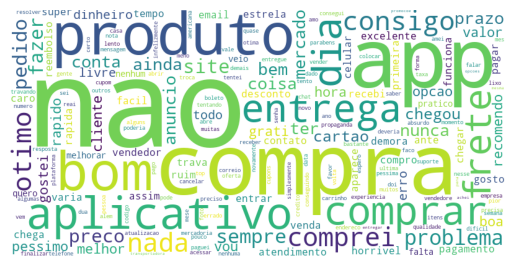

In [49]:
# WORDCLOUD
wordcloud2 = WordCloud(width = 800, height = 400, background_color = "white", collocations = False, 
                      include_numbers = True, random_state = 1)
wordcloud2.generate(texto_wordcloud2)

# GR√ÅFICO
#plt.figure(figsize = (40, 8))
plt.axis("off")
plt.imshow(wordcloud2)
wordcloud2.to_file("wordcloud-depois.png")

O "n√£o" foi removido da lista de stopwords, pois se removido como stopwords iria afetar o sentido de algumas senten√ßas no portugu√™s. Ex: "n√£o √© bom" (negativo), "√© bom" (positivo).

#### LEMMATIZATION E STEMMING

In [50]:
# FUN√á√ÉO LEMMATIZATION
def Lematizacao(texto):
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_lema = []

    
    for palavra in lista_palavras:
        if palavra in dicionario_lema.keys():
            palavra_lema = dicionario_lema.get(palavra)
            lista_lema.append(palavra_lema)
            
        else:
            lista_lema.append(palavra)
            
    texto_lema = ' '.join(lista_lema) 
    return texto_lema

In [51]:
# LEMATIZA√á√ÉO
arquivo_lema = open("lematizacao-portugues.txt", encoding = 'UTF-8')

In [52]:
dicionario_lema = {}

for linha in arquivo_lema:
    palavras = linha.split()
    dicionario_lema[RemoveCaracter(palavras[1])] = RemoveCaracter(palavras[0])

In [53]:
df_content['passo6'] = df_content['passo5'].apply(Lematizacao)

In [54]:
df_content.loc[:,['passo5','passo6']]

passo5  \
0       pros comparado aplicativo concorrentes longe m...   
1       alguns problemas ex navegacao entra produto ap...   
2       aplicativo bem basico informacoes suficientes ...   
3       navegar lista desejos eventualmente tornase im...   
4       precisa melhorar questao interface filtros cat...   
...                                                   ...   
319138                                            aumenta   
319139                                                bom   
319140                                   gostei recomendo   
319141          facil encontrar produtos qualidade gostei   
319142                                              otimo   

                                                   passo6  
0       pros comparar aplicativo concorrente longe mel...  
1       algum problema ex navegacao entrar produto ape...  
2       aplicativo bem basico informacao suficiente re...  
3       navegar lista desejo eventualmente tornase imp...  
4       preciso melhorar questao interface filtro cate...  
...                                                   ...  
319138                                           aumentar  
319139                                                bom  
319140                                  gostar recomendar  
319141           facil encontrar produto qualidade gostar  
319142                                              otimo  

[319143 rows x 2 columns]

In [55]:
# QUANTIDADE DE ATRIBUTOS AP√ìS LEMATIZA√á√ÉO
count_vectorizer2 = CountVectorizer(ngram_range = (1,1))
count_vectorizer2.fit_transform(df_content.passo6)
variaveis2 = count_vectorizer2.get_feature_names()

In [56]:
# COMPARA√á√ÉO QUANTIDADE DE PALAVRAS ANTES E DEPOIS DA LEMATIZA√á√ÉO
print(f"Quantidade de atributos ap√≥s aplica√ß√£o das stopwords: {len(variaveis1)} palavras")
print(f"Quantidade de atributos ap√≥s aplica√ß√£o da lematiza√ß√£o: {len(variaveis2)} palavras")

Quantidade de atributos ap√≥s aplica√ß√£o das stopwords: 53680 palavras
Quantidade de atributos ap√≥s aplica√ß√£o da lematiza√ß√£o: 37022 palavras


#### STEMMING


In [57]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lealj\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [58]:
# FUN√á√ÉO STEMMING
def Stemming(texto):
    pt_stemmi = RSLPStemmer()
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_stemmi = []

    
    for palavra in lista_palavras:
            lista_stemmi.append(pt_stemmi.stem(palavra))
            
    texto_stemmi = ' '.join(lista_stemmi) 
    return texto_stemmi

In [59]:
df_content['passo7'] = df_content['passo5'].apply(Stemming)

In [60]:
df_content.loc[:,['passo5','passo6','passo7']]

passo5  \
0       pros comparado aplicativo concorrentes longe m...   
1       alguns problemas ex navegacao entra produto ap...   
2       aplicativo bem basico informacoes suficientes ...   
3       navegar lista desejos eventualmente tornase im...   
4       precisa melhorar questao interface filtros cat...   
...                                                   ...   
319138                                            aumenta   
319139                                                bom   
319140                                   gostei recomendo   
319141          facil encontrar produtos qualidade gostei   
319142                                              otimo   

                                                   passo6  \
0       pros comparar aplicativo concorrente longe mel...   
1       algum problema ex navegacao entrar produto ape...   
2       aplicativo bem basico informacao suficiente re...   
3       navegar lista desejo eventualmente tornase imp...   
4       preciso melhorar questao interface filtro cate...   
...                                                   ...   
319138                                           aumentar   
319139                                                bom   
319140                                  gostar recomendar   
319141           facil encontrar produto qualidade gostar   
319142                                              otimo   

                                                   passo7  
0       pro compar aplic concorr long melhor lev intui...  
1       algum problem ex navegaca entr produt apert im...  
2       aplic bem basic informaco sufici realizaca com...  
3       naveg list desej event tornas impossi quant te...  
4       precis melhor questa interfac filtr categor pr...  
...                                                   ...  
319138                                             aument  
319139                                                bom  
319140                                         gost recom  
319141                     facil encontr produt qual gost  
319142                                               otim  

[319143 rows x 3 columns]

In [61]:
# VERIFICAR A EXIST√äNCIA DE VALORES NaN NO CAMPO DE COMENT√ÅRIOS DO PASSO 5
df_content[['passo6']].isna().values.any()

False

In [62]:
# VERIFICAR CAMPOS VAZIOS
df_content.loc[df_content['passo6'] == '']

sentimento             content             passo1         passo2  \
1140       neutro       Mais do mesmo      mais do mesmo  mais do mesmo   
1164       neutro           Que a sws          que a sws      que a sws   
1187       neutro  ‚Å¥disske 3613-7 i0k   disske       i k     disske i k   
1191       neutro              Amazon             amazon         amazon   
1201       neutro               556 5                                     
...           ...                 ...                ...            ...   
318533   positivo                 üòÅüòÅüòÅ                                     
318592   positivo                 üëçüëçüëç                                     
318868   positivo                   üëç                                     
318977   positivo                   üåµ                                     
319075   positivo                   üëè                                     

               passo3         passo4 passo5 passo6 passo7  
1140    mais do mesmo  mais do mesmo                       
1164        que a sws            que                       
1187                                                       
1191                                                       
1201                                                       
...               ...            ...    ...    ...    ...  
318533                                                     
318592                                                     
318868                                                     
318977                                                     
319075                                                     

[2232 rows x 9 columns]

In [63]:
# REMOVE ESPA√áOS EM BRANCO
indices = df_content[df_content['passo6'] == ''].index
df_content.drop(indices , inplace = True)

In [64]:
# CRIAR DATASET BIN√ÅRIO
df_content_binario = df_content[df_content['sentimento'] != 'neutro']
df_content_binario.head(5)

sentimento                                            content  \
106381   negativo  Promo√ß√£o cart√£o sem anuidade, me enviaram e-ma...   
106382   negativo  Este app e verdadeiramente uma piada, com pre√ß...   
106383   negativo                       P√©ssimo nao aceita meu email   
106384   negativo  Comprei v√°rios produtos h√° uns meses atr√°s por...   
106385   negativo  O aplicativo √© bom, mais eu me decepcionei com...   

                                                   passo1  \
106381  promocao cartao sem anuidade  me enviaram emai...   
106382  este app e verdadeiramente uma piada  com prec...   
106383                       pessimo nao aceita meu email   
106384  comprei varios produtos ha uns meses atras por...   
106385  o aplicativo e bom  mais eu me decepcionei com...   

                                                   passo2  \
106381  promocao cartao sem anuidade me enviaram email...   
106382  este app e verdadeiramente uma piada com preco...   
106383                       pessimo nao aceita meu email   
106384  comprei varios produtos ha uns meses atras por...   
106385  o aplicativo e bom mais eu me decepcionei com ...   

                                                   passo3  \
106381  promocao cartao sem anuidade me enviaram email...   
106382  este app e verdadeiramente uma piada com preco...   
106383                       pessimo nao aceita meu email   
106384  comprei varios produtos ha uns meses atras por...   
106385  aplicativo e bom mais eu me decepcionei com qu...   

                                                   passo4  \
106381  promocao cartao sem anuidade me enviaram email...   
106382  este app verdadeiramente uma piada com precos ...   
106383                       pessimo nao aceita meu email   
106384  comprei varios produtos ha uns meses atras por...   
106385  aplicativo bom mais me decepcionei com que qua...   

                                                   passo5  \
106381  promocao cartao anuidade enviaram email tentei...   
106382  app verdadeiramente piada precos exorbitantes ...   
106383                           pessimo nao aceita email   
106384  comprei produtos meses atras mercadoria nao sa...   
106385       aplicativo bom decepcionei qualidade produto   

                                                   passo6  \
106381  promocao cartao anuidade enviar email tentar f...   
106382  app verdadeiramente piar preco exorbitante pro...   
106383                               mau nao aceito email   
106384  comprar produto mes atro mercadoria nao sair l...   
106385       aplicativo bom decepcionar qualidade produto   

                                                   passo7  
106381  promoca carta anuidad envi email tent faz comp...  
106382  app verdade pi prec exorbit produt falcific pl...  
106383                               pess nao aceit email  
106384  compr produt mes atr mercad nao sai lig diz co...  
106385                    aplic bom decepcion qual produt

In [65]:
# SALVAR ARQUIVO FINAL
df_content.to_csv('df-content-ternario.csv', index = False)  
df_content_binario.to_csv('df-content-binario.csv', index = False)  